# $\textbf{Laboratorio 1 Estadística Computacional}$


$\textbf{Estudiantes:}$

Fernanda Araya Zárate - $202173026-5$

Javier Miranda Lanyon - $202104073-0$

Rodrigo Pizarro Alegría - $201910012-2$


En primer lugar, importaremos todas las librerías que vamos a utilizar para desarrollar la experiencia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


KernelInterrupted: Execution interrupted by the Jupyter kernel.

Luego, importamos los datos como dataframe. Nótese que dropeamos la primera columna que básicamente repite el Rank.

In [2]:
df = pd.read_csv('games.csv')
del df[df.columns[0]]
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16318,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16319,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16320,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16321,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Veamos las categorías que hay:

In [3]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Respuestas:

# 3.1. Análisis Univariado


3.1 a) Basta ejecutar el siguiente código, que nos entregará lo que deseamos:

In [4]:
generos = df['Genre'].nunique()
print("Existen", generos, "géneros de videojuegos")
print("\n")
listax=[]
listay=[]
for i in range(0,12):
    print("El porcentaje de juegos del género", df['Genre'].unique()[i], "es", (df['Genre'].value_counts()[i]/16323)*100, "%")
print("\n")
total = df["Global_Sales"].sum()

for i in range(0,12):
    print("El porcentaje de ventas totales del género", df['Genre'].unique()[i], "es", (df.loc[df['Genre']==df['Genre'].unique()[i], "Global_Sales"].sum())/total * 100, "%")
    listax.append(df['Genre'].unique()[i])
    listay.append((df.loc[df['Genre']==df['Genre'].unique()[i], "Global_Sales"].sum())/total * 100)

Existen 12 géneros de videojuegos


El porcentaje de juegos del género Sports es 19.922808307296453 %
El porcentaje de juegos del género Platform es 14.115052380077191 %
El porcentaje de juegos del género Racing es 10.47601543833854 %
El porcentaje de juegos del género RPG es 8.999571157262757 %
El porcentaje de juegos del género Puzzle es 7.853948416345034 %
El porcentaje de juegos del género Misc es 7.817190467438584 %
El porcentaje de juegos del género Shooter es 7.5108742265514925 %
El porcentaje de juegos del género Simulation es 5.366660540341849 %
El porcentaje de juegos del género Action es 5.207376095080561 %
El porcentaje de juegos del género Fighting es 5.121607547632175 %
El porcentaje de juegos del género Adventure es 4.110763952704772 %
El porcentaje de juegos del género Strategy es 3.4981314709305886 %


El porcentaje de ventas totales del género Sports es 14.843957269938166 %
El porcentaje de ventas totales del género Platform es 9.400772333849583 %
El porcentaje de ven

A continuación, podemos graficar los porcentajes v/s el género para el caso de las ventas globales.

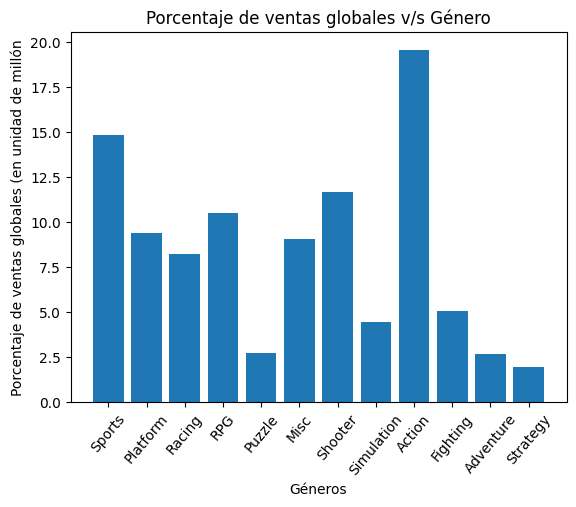

In [5]:
plt.bar(listax,listay)
plt.xticks(rotation=50)
plt.xlabel("Géneros")
plt.ylabel("Porcentaje de ventas globales (en unidad de millón")
plt.title("Porcentaje de ventas globales v/s Género")
plt.show()

3.1 b) Basta ejecutar el siguiente código, que nos entregará lo que deseamos:

In [6]:
mean_eu = df['EU_Sales'].mean()
mean_jp = df['JP_Sales'].mean()
mean_na = df['NA_Sales'].mean()
std_eu = df['EU_Sales'].std()
std_jp = df['JP_Sales'].std()
std_na = df['NA_Sales'].std()

print("La media de ventas de EU, JP y NA son: ", mean_eu, mean_jp, mean_na , "respectivamente")
print("La desviación estandar de ventas de EU, JP y NA son: ", std_eu, std_jp, std_na,  "respectivamente")


La media de ventas de EU, JP y NA son:  0.14759051644918217 0.07867732647184954 0.26546345647246217 respectivamente
La desviación estandar de ventas de EU, JP y NA son:  0.5088227915445547 0.3115933871006417 0.8216836359619394 respectivamente


3.1 c) Podemos utilizar describe para obtener los resultados deseados

In [7]:
df['Global_Sales'].describe()

count    16323.000000
mean         0.540343
std          1.565906
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

Como la unidad es de millón, entonces tenemos que globalmente se vende aproximadamente una media de 540000 copias de cada juego, siendo la menor cantidad 10000 y la mayor cantidad 82740000. Los percentiles de interes se encuentran en 60000 y 480000 respectivamente. Realizaremos a continuación un boxplot de las ventas globales, pero rápidamente notamos que no es muy representativo debido a la cantidad de datos que hay. Convendría mucho más hacer un análisis estratificado como veremos más adelante.


<AxesSubplot: >

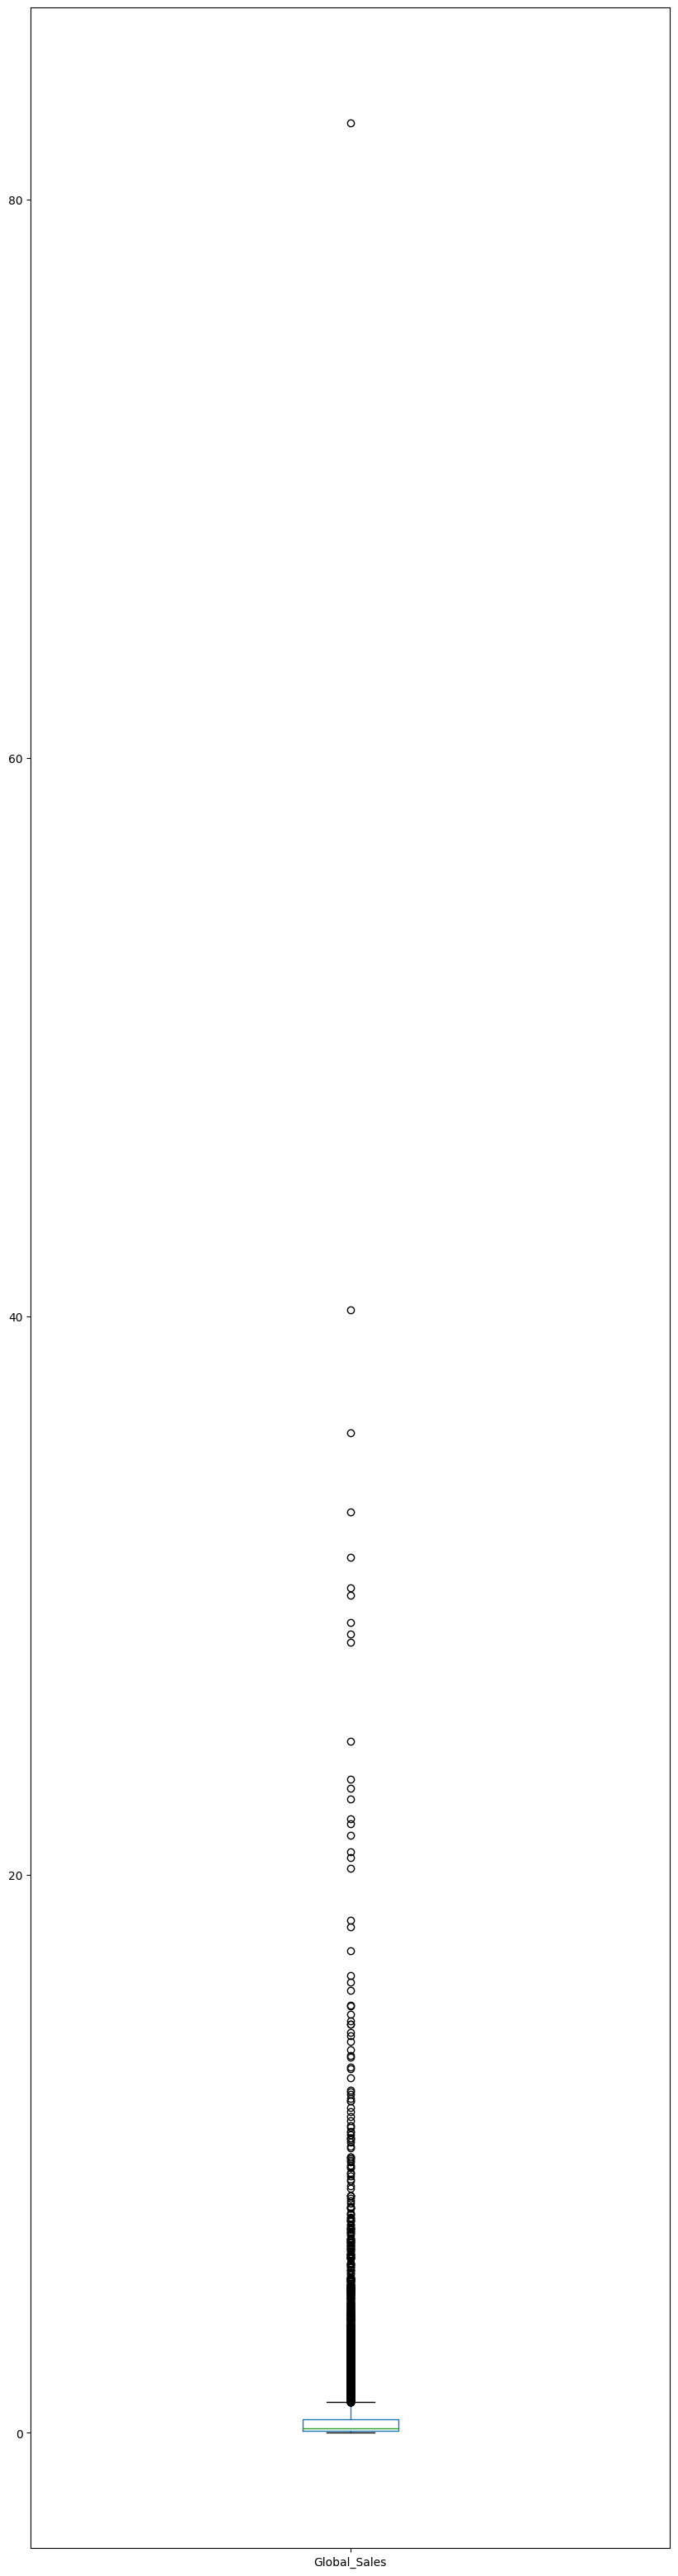

In [24]:
df.boxplot(column =['Global_Sales'], grid = False , figsize=(10,40))


3.1 d) Para la primera pregunta, basta hallar el percentil 90 y multiplicarlo por un millón:

In [9]:
int(df['Global_Sales'].quantile(.9)*1000000)

1218000

Para la segunda, contamos cuántos juegos tienen más de un millón de ventas, los dividimos por el total de juegos y multiplicamos por 100

In [10]:
valor = (df["Global_Sales"][df["Global_Sales"] > 1.0].count())/16323 * 100
print("El porcentaje de juegos que tiene mas de un millón de ventas es ", valor, "%")

El porcentaje de juegos que tiene mas de un millón de ventas es  12.448692029651411 %


3.1 e) Un conjunto de datos se puede considerar sesgado bajo muchas situaciones. Explicaremos una de las más comunes, que es cuando la extracción de datos se hace de una fuente que no es completamente parcial o fiable. Un ejemplo actual podría ser en el caso de elecciones políticas, donde se hicieron muchos análisis respecto a las opiniones de personas en redes sociales para determinar aproximadamente cuáles eran las chances de ganar de cada candidato. Crear un conjunto de datos en base a estas observaciones tiene la posibilidad de crear datos sesgados, ya que mucha gente que vota no comparte su opinión política en redes sociales o directamente no las utiliza. Respecto a qué medida de tendencia central conviene usar, en este caso debería ser la mediana, ya que si por ejemplo utilizaramos la media, si la muestra está sesgada tiene muchas mas chances de tener outliers, alterando la representación usual que tiene la media. Para la medida de dispersión, dependiendo de la variabilidadd puede utilizarse la desviación estandar o en casos extremos podría ser buen candidato el rango intercuartílico, ya que es robusto a la hora de trabajar con datos con información sesgada, pues omite extremos.

3.1 f) En general, la media se debería usar en la mayoría de casos. Lo interesante es presentar los casos en los cuales la mediana o la moda son preferidos antes de la media, pues de esta manera respondemos la pregunta a cabalidad:

La mediana es la medida de tendencia central a utilizar cuando:
1) Existen outliers (es decir, datos extremos). Esto se debe a que la media se puede alterar de manera significativa frente a ellos.
2) Los datos están distribuidos de manera bivariada, por ejemplo, los datos fueron medidos en categorías de 1,2,3 y "4 o más". Claramente acá no se puede calcular la media, ya que tenemos 3 categorías que corresponden a un número y una categoría que corresponde a un intervalo infinito.
3) Tenemos datos faltantes (missing values).

La moda por otra parte, es conveniente utilizarla cuando tenemos datos que no son numéricos, ya que claramente no se podría calcular la media

# 3.2. Análisis Estratificado

3.2) a) Analizamos las ventas globales por género primero y luego hacemos lo mismo para años

<AxesSubplot: title={'center': 'Global_Sales'}, xlabel='Genre'>

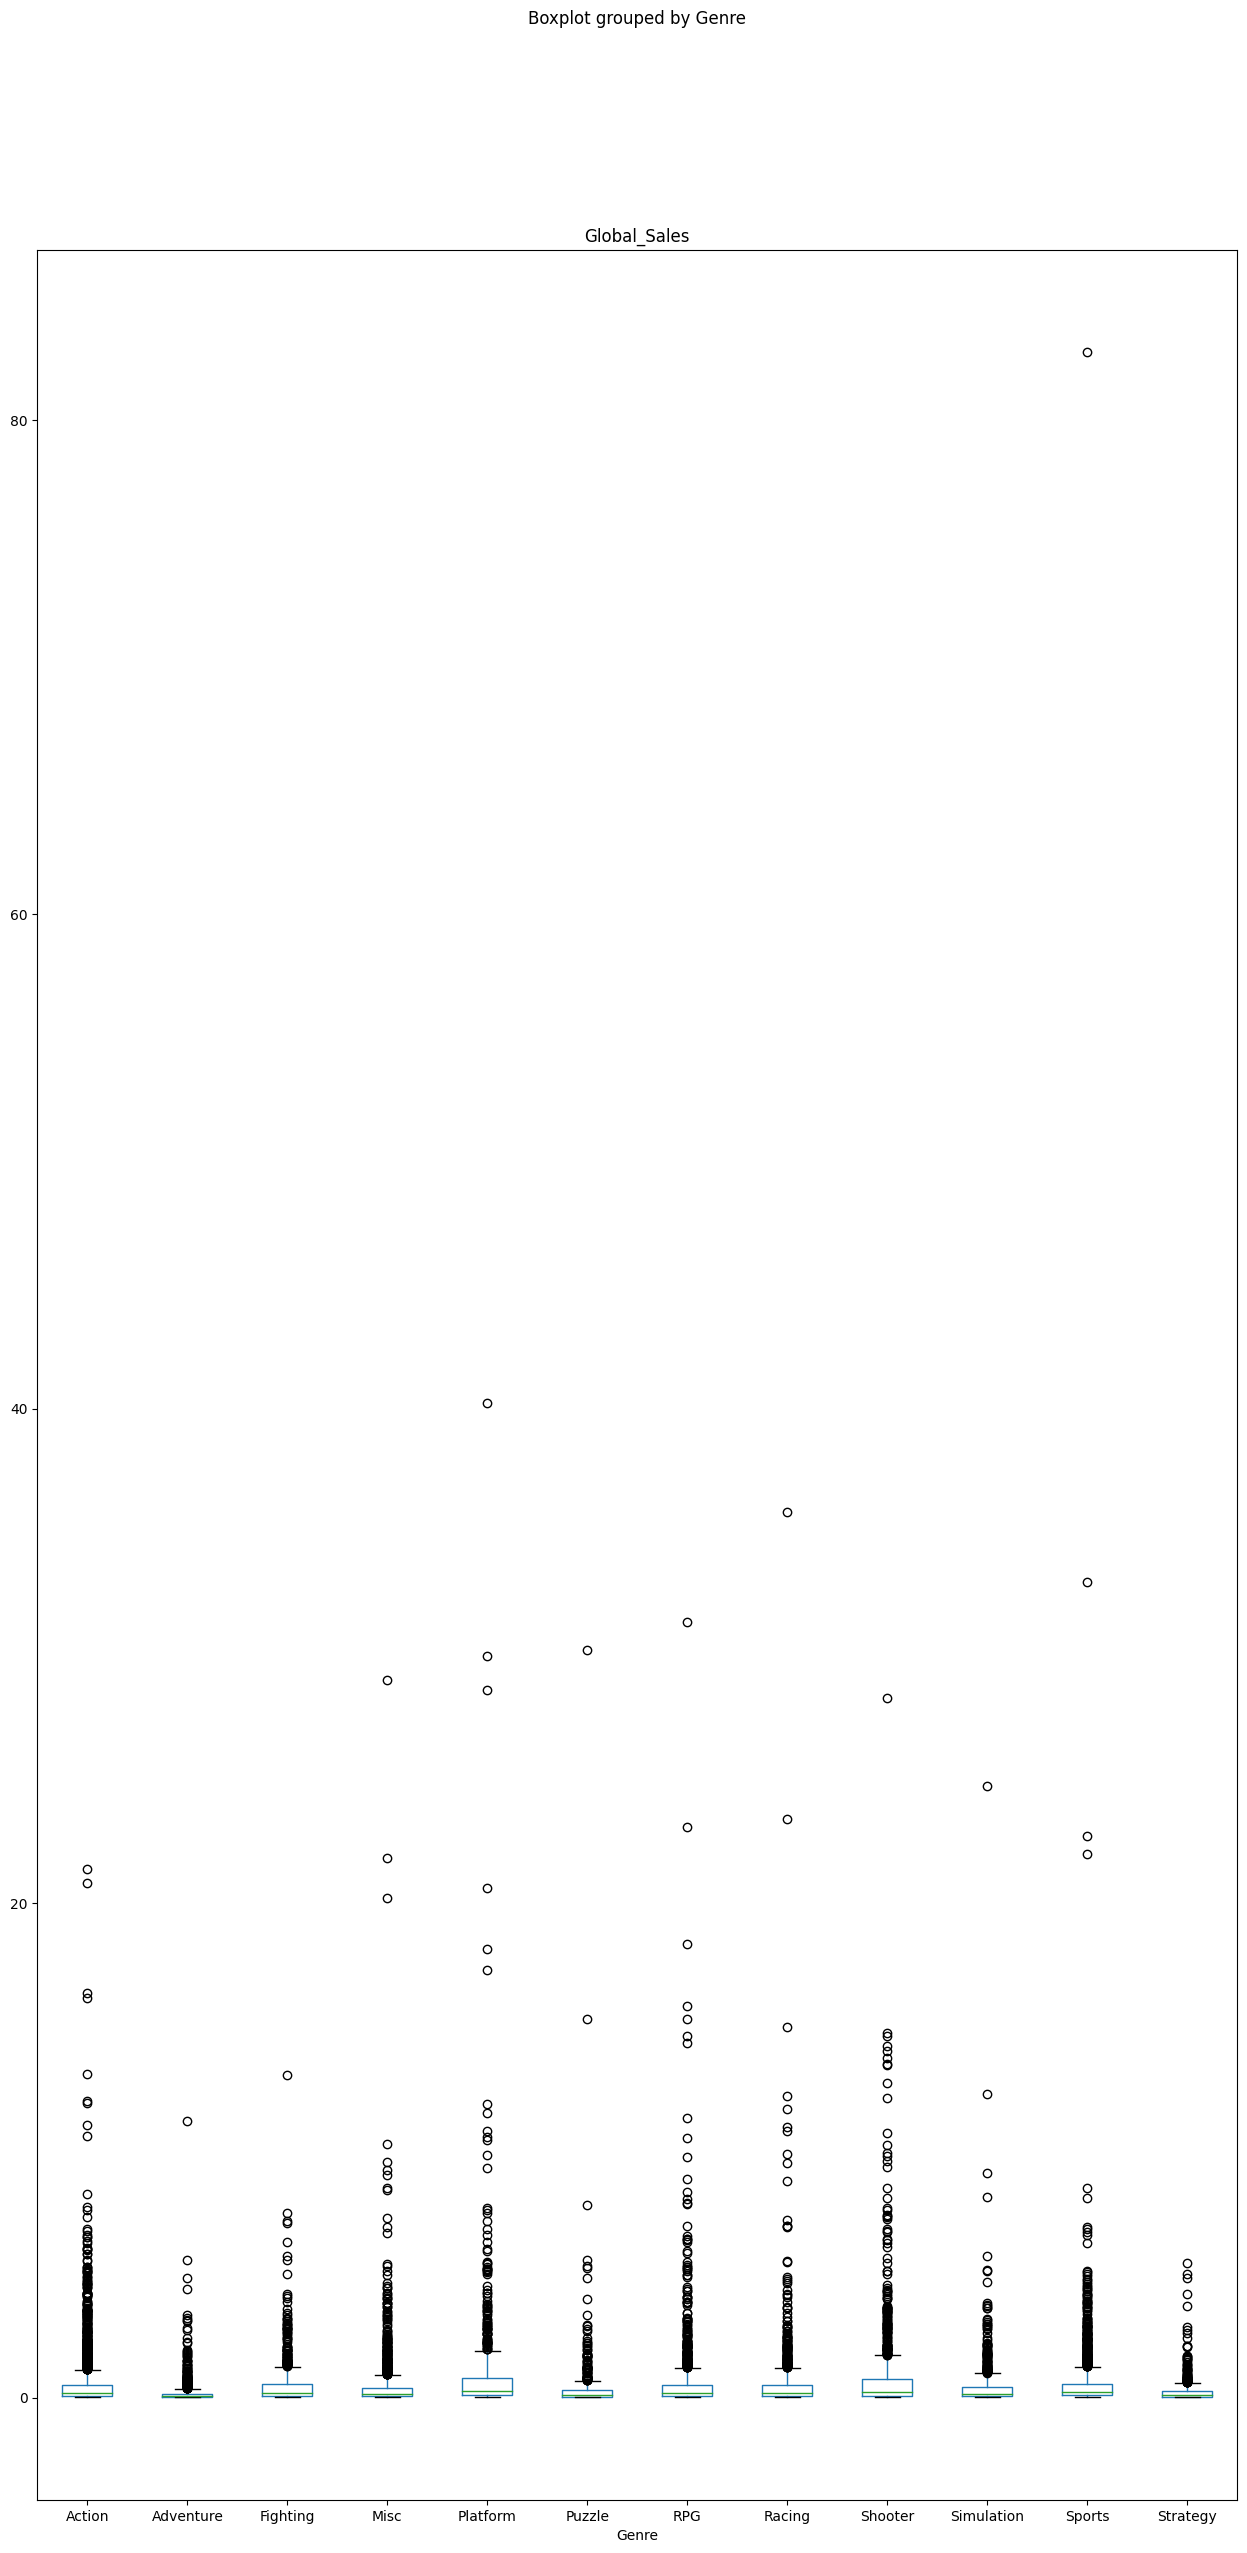

In [11]:
df.boxplot(by ='Genre', column =['Global_Sales'], grid = False , figsize=(15,30))

<AxesSubplot: title={'center': 'Global_Sales'}, xlabel='Year'>

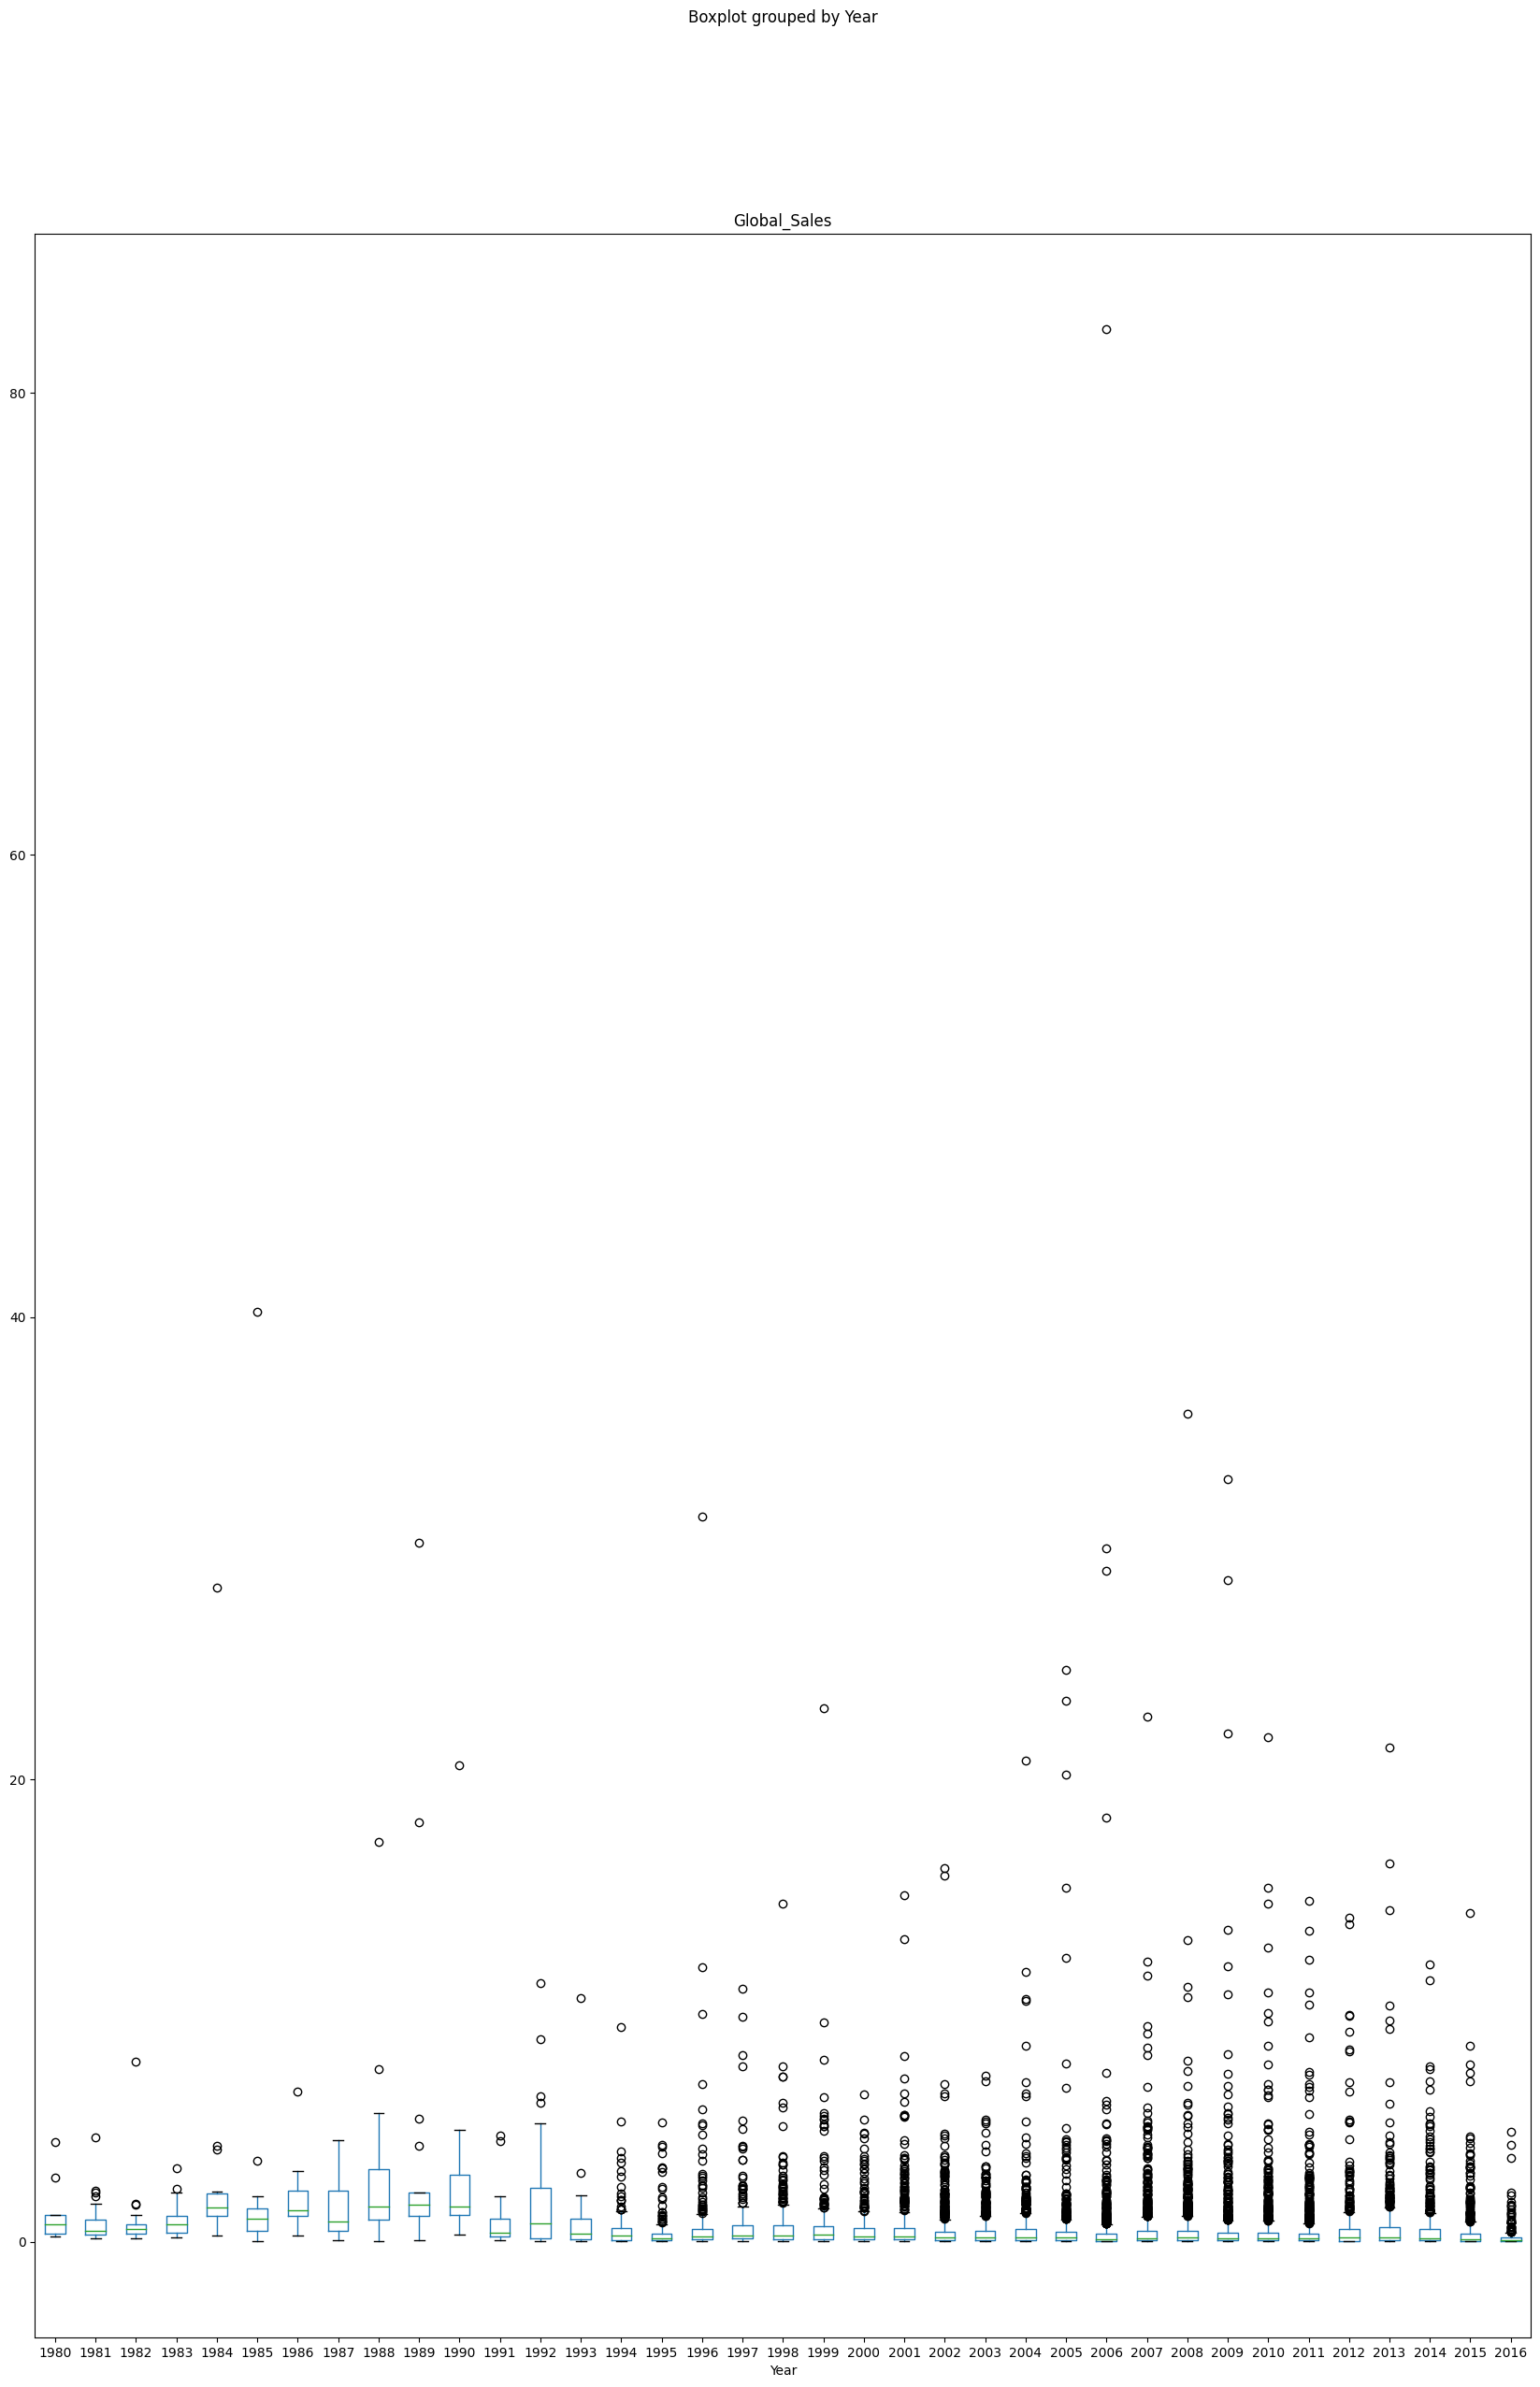

In [12]:
df.boxplot(by ='Year', column =['Global_Sales'], grid = False , figsize=(20,30))

Notamos que estos análisis son mucho más claros para entender la distribución de las ventas globales ya sea por género o por año, ya que realizamos la división en estas categorías y es mucho más sencillo detectar outliers o las distintas concentraciones de ventas que existen. De todas maneras, podemos representar toda esta información tabulada en un dataframe, para que nos quede más claro aún que es lo que está ocurriendo por género y por año:

In [36]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
genre_sales.columns = ['Genre', 'Total_Sales']
print("Ventas globales por cada género")
print(genre_sales)
print("\n")

bins = [1980, 1990, 2000, 2010, 2017]
labels = ['1980-1989', '1990-1999', '2000-2009', '2010-2016']
df['Year_Group'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)
year_sales = df.groupby('Year_Group')['Global_Sales'].sum().reset_index()
year_sales.columns = ['Genre', 'Total_Sales']
print(year_sales)



Ventas globales por cada género
         Genre  Total_Sales
0       Action      1722.87
1    Adventure       234.80
2     Fighting       444.05
3         Misc       797.62
4     Platform       829.15
5       Puzzle       242.22
6          RPG       923.80
7       Racing       726.77
8      Shooter      1026.20
9   Simulation       389.87
10      Sports      1309.24
11    Strategy       173.43


       Genre  Total_Sales
0  1980-1989       376.58
1  1990-1999      1278.91
2  2000-2009      4644.02
3  2010-2016      2520.51


3.2 b) Graficaremos las ventas de cada región por cada año

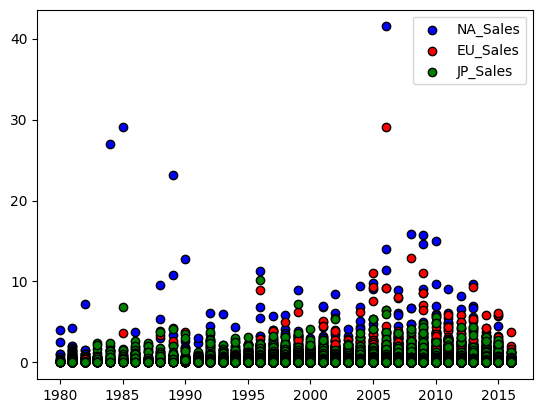

In [13]:
x=df['Year']
y1=df['NA_Sales']
y2=df['EU_Sales']
y3=df['JP_Sales']
plt.scatter(x,y1, label='NA_Sales', color='blue', edgecolors="k")
plt.scatter(x,y2, label='EU_Sales', color='red', edgecolors="k")
plt.scatter(x,y3, label='JP_Sales', color='green', edgecolors="k")
plt.legend()
plt.show()



Podemos observar que, al parecer, los años más prolíficos de cada región deberían ubicarse entre el 2005 y 2010, esto pues existen dos outliers cuyas ventas superan aproximadamente los 30 millones de copias y además se puede observar que la concentración de puntos es mayor en este intervalo. Esto lo podemos verificar con el siguiente código:

In [27]:
sum_na = df.groupby('Year')['NA_Sales'].sum()
sum_eu = df.groupby('Year')['EU_Sales'].sum()
sum_jp = df.groupby('Year')['JP_Sales'].sum()
year_na = sum_na.idxmax()
year_eu = sum_eu.idxmax()
year_jp = sum_jp.idxmax()
greatest_na = sum_na.max()
greatest_eu = sum_eu.max()
greatest_jp = sum_jp.max()
print("El año con la mayor cantidad de ventas de la región NA es", year_na, "con ", greatest_na, "millones de copias vendidas")
print("El año con la mayor cantidad de ventas de la región EU es", year_eu, "con ", greatest_eu, "millones de copias vendidas")
print("El año con la mayor cantidad de ventas de la región JP es", year_jp, "con ", greatest_jp, "millones de copias vendidas")

El año con la mayor cantidad de ventas de la región NA es 2008 con  351.43999999999915 millones de copias vendidas
El año con la mayor cantidad de ventas de la región EU es 2009 con  191.5899999999998 millones de copias vendidas
El año con la mayor cantidad de ventas de la región JP es 2006 con  73.72999999999998 millones de copias vendidas
0       41.49
1       29.08
2       15.85
3       15.75
4       11.27
        ...  
1747     1.07
1790     0.23
1798     1.05
1949     0.99
2633     0.72
Name: NA_Sales, Length: 185, dtype: float64


3.2 c) Para la primera pregunta, basta ejecutar el siguiente código, ya que value_counts() retorna en orden decreciente los resultados

In [15]:
df['Publisher'].value_counts().head(10)


Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: Publisher, dtype: int64

Para responder lo siguiente, en primer lugar, podemos graficar la cantidad de ventas de cada empresa respecto a su cantidad de ventas globales:

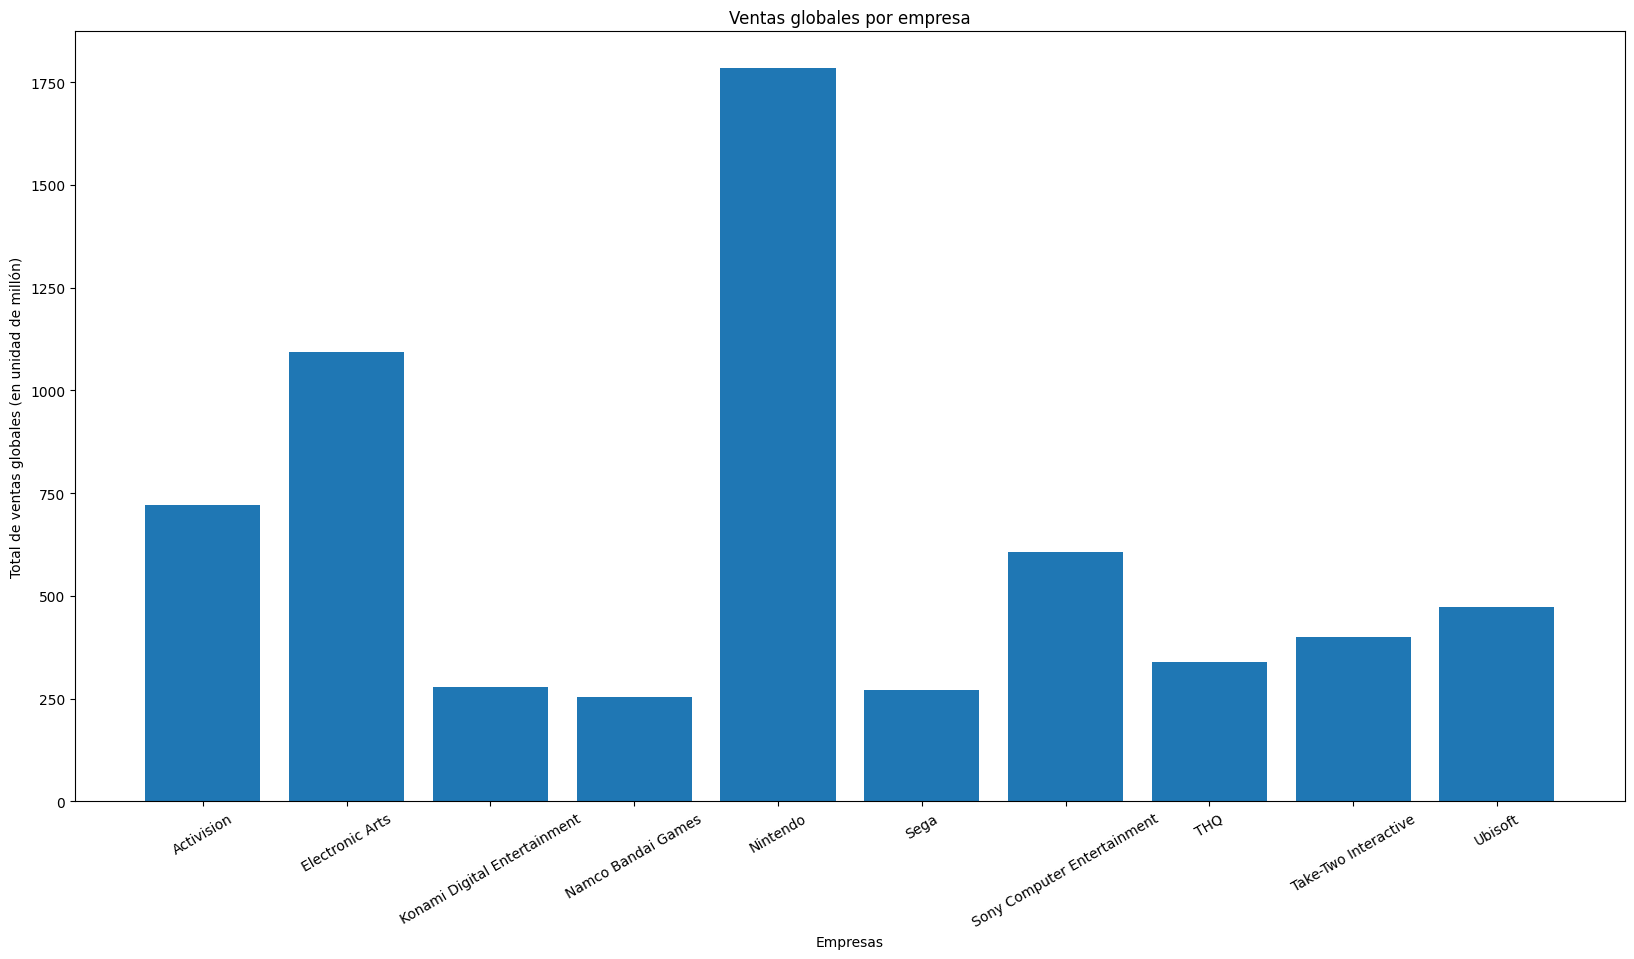

In [16]:
lista_empresas=[]
for i in range(0,10):
    unique_value = (df['Publisher'].value_counts().head(10)).index[i]
    lista_empresas.append(unique_value)
filtrado  = df[df['Publisher'].isin(lista_empresas)]
sales_sum = filtrado.groupby('Publisher')['Global_Sales'].sum().reset_index()
ejex=sales_sum["Publisher"].tolist()
ejey=sales_sum["Global_Sales"].tolist()
plt.figure(figsize=(20, 10))
plt.bar(ejex,ejey)
plt.xticks(rotation=30)
plt.xlabel("Empresas")
plt.ylabel("Total de ventas globales (en unidad de millón)")
plt.title("Ventas globales por empresa")
plt.show()


Claramente se puede observar que la empresa más exitosa (si nos basamos exclusivamente en cantidad de ventas bajo nuestros supuestos) es Nintendo.

3.2 d) Escogeremos las 5 plataformas con mayor cantidad de juegos de la siguiente manera:

In [17]:
df['Platform'].value_counts().head(5)


DS      2132
PS2     2127
PS3     1304
Wii     1290
X360    1235
Name: Platform, dtype: int64

A continuación, hacemos un análisis muy similar al del ítem anterior:

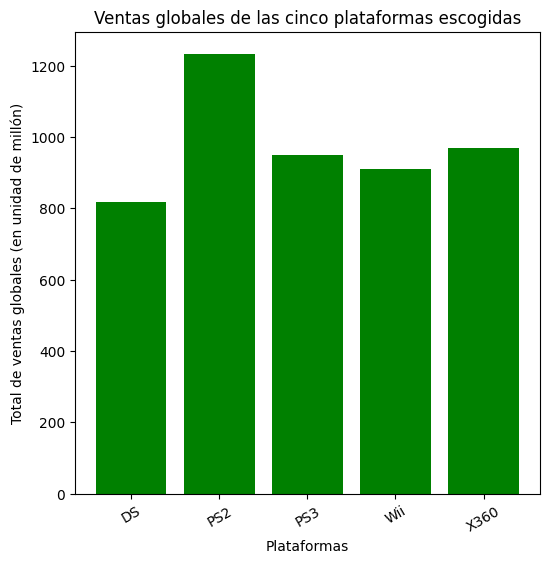

In [18]:
lista_plataformas=[]
for i in range(0,5):
    unique_value = (df['Platform'].value_counts().head(5)).index[i]
    lista_plataformas.append(unique_value)
filtrado  = df[df['Platform'].isin(lista_plataformas)]
platform_sum = filtrado.groupby('Platform')['Global_Sales'].sum().reset_index()
ejexd=platform_sum["Platform"].tolist()
ejeyd=platform_sum["Global_Sales"].tolist()
plt.figure(figsize=(6, 6))
plt.bar(ejexd,ejeyd, color = "green")
plt.xticks(rotation=30)
plt.xlabel("Plataformas")
plt.ylabel("Total de ventas globales (en unidad de millón)")
plt.title("Ventas globales de las cinco plataformas escogidas")
plt.show()

Concluimos que PS2 es la plataforma dentro de las cinco escogidas que posee mayor popularidad en todos los años.

3.2 e) Generamos los boxplots por cada género, repitiendo el codigo de 3.2 a), donde podemos observar claramente los outliers de cada género:

<AxesSubplot: title={'center': 'Global_Sales'}, xlabel='Genre'>

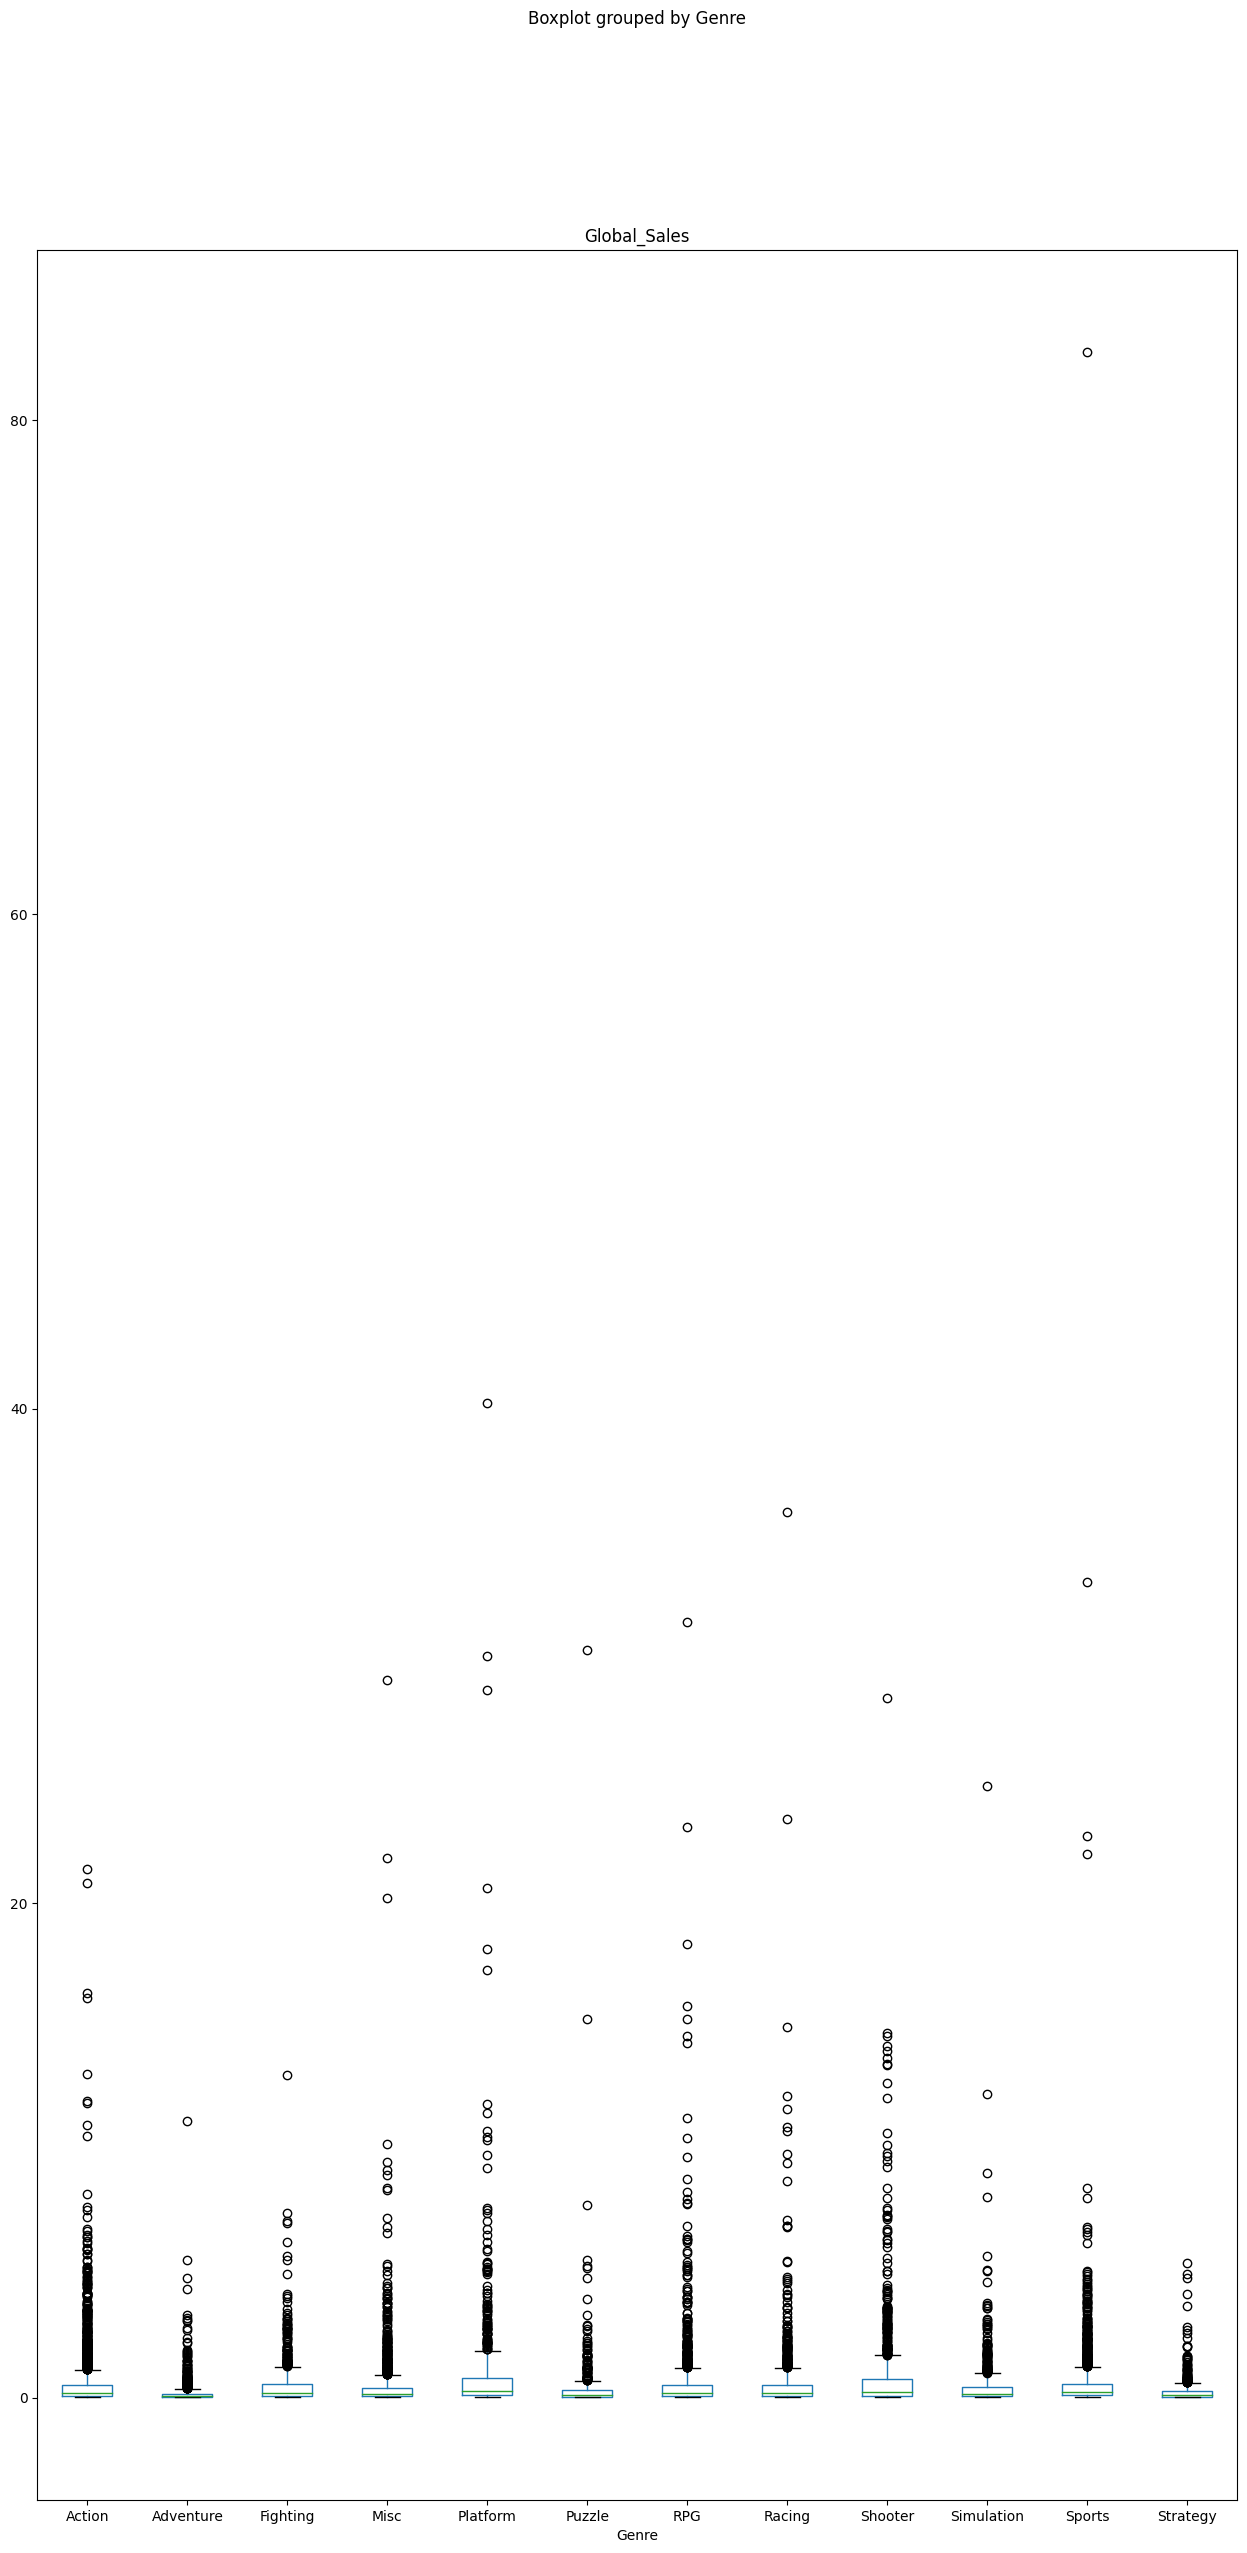

In [37]:
df.boxplot(by ='Genre', column =['Global_Sales'], grid = False , figsize=(15,30))

# 3.3. Análisis Bivariado

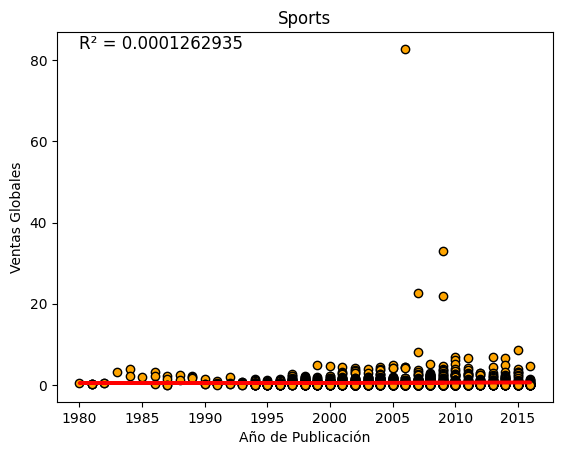

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 2.1043366913
0        82.169561
3        32.416964
13       22.145362
14       21.416964
77        7.881771
           ...    
16301    -0.602428
16303    -0.581433
16304    -0.535245
16306    -0.581433
16312    -0.573036
Name: Global_Sales, Length: 2304, dtype: float64


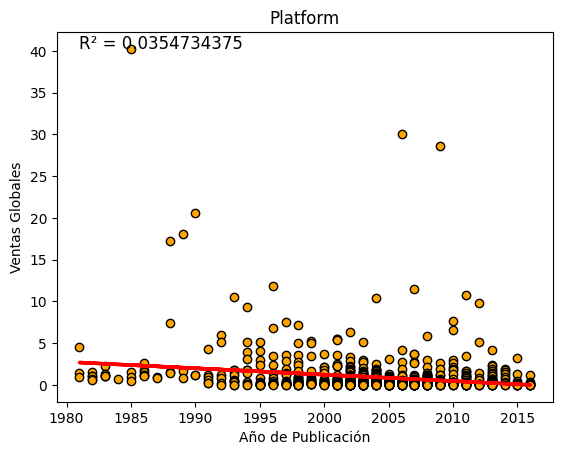

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 2.5506777157
1        37.851648
6        29.230429
8        28.070255
18       18.604691
21       16.058082
           ...    
16223    -0.769571
16287    -0.003485
16290    -0.080093
16318    -1.076005
16322    -0.999397
Name: Global_Sales, Length: 876, dtype: float64


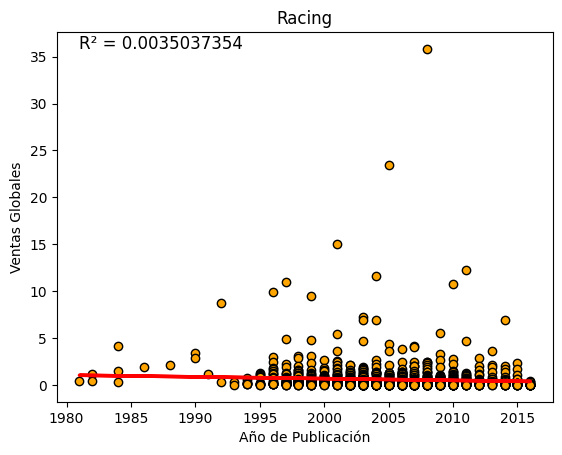

Media de Residuos: 0.0000000000
Desviación Estándar de Residuos: 1.6731479435
2        35.286577
11       22.830206
28       14.315046
42       11.732947
47       11.051416
           ...    
16255    -0.373102
16268    -0.467053
16298    -0.542213
16299    -0.523423
16320    -0.523423
Name: Global_Sales, Length: 1226, dtype: float64


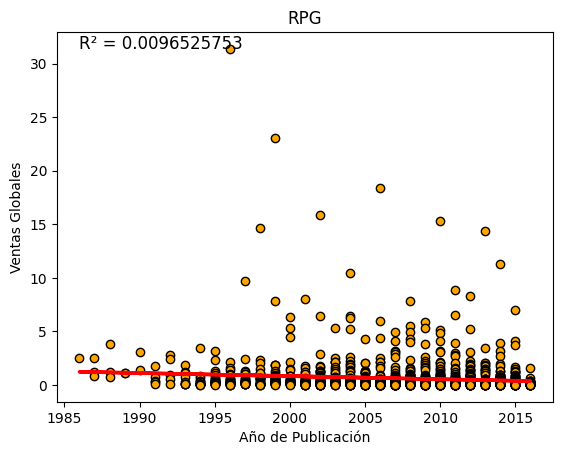

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 1.7090719076
4        30.423349
12       22.239687
20       17.701143
25       15.076025
26       14.776260
           ...    
16245    -0.648857
16250    -0.591298
16278    -0.418622
16281    -0.763975
16315    -0.620078
Name: Global_Sales, Length: 1469, dtype: float64


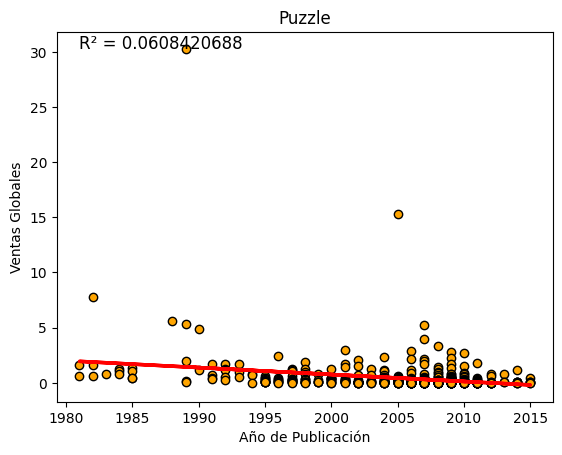

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 1.5262337599
5        28.814787
27       14.860495
89        5.924789
155       4.071930
170       3.894787
           ...    
16272    -0.366648
16293    -0.366648
16309    -0.555218
16313    -0.240934
16321    -0.115221
Name: Global_Sales, Length: 571, dtype: float64


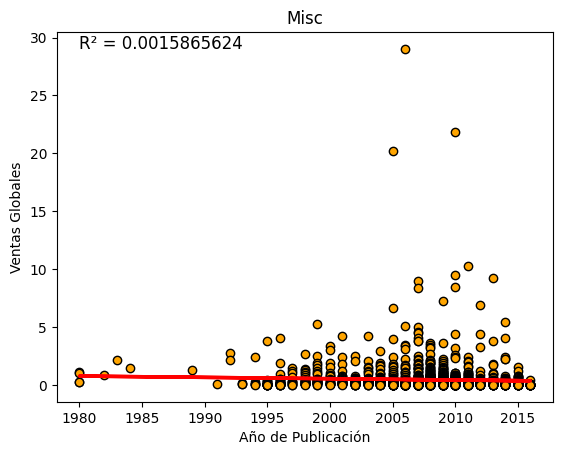

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 1.3218608059
7        28.539326
15       21.384554
19       19.728019
60        9.835861
68        9.084554
           ...    
16241    -0.402832
16244    -0.380218
16248    -0.470674
16261    -0.414139
16267    -0.368911
Name: Global_Sales, Length: 1710, dtype: float64


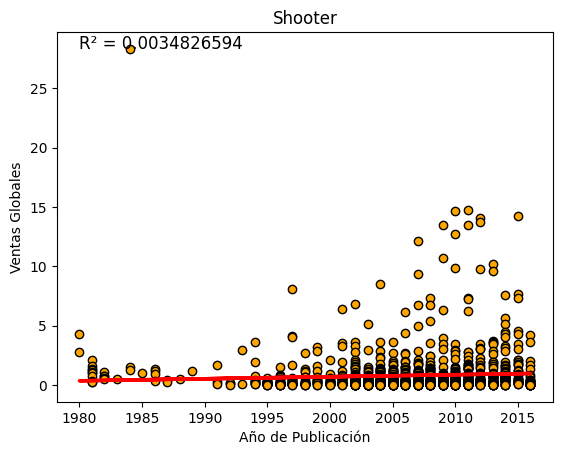

Media de Residuos: 0.0000000000
Desviación Estándar de Residuos: 1.8296685277
9        27.882800
29       13.873003
31       13.770032
33       13.284885
34       13.125973
           ...    
16226    -0.859968
16294    -0.962145
16302    -0.842938
16310    -0.876997
16319    -0.740761
Name: Global_Sales, Length: 1282, dtype: float64


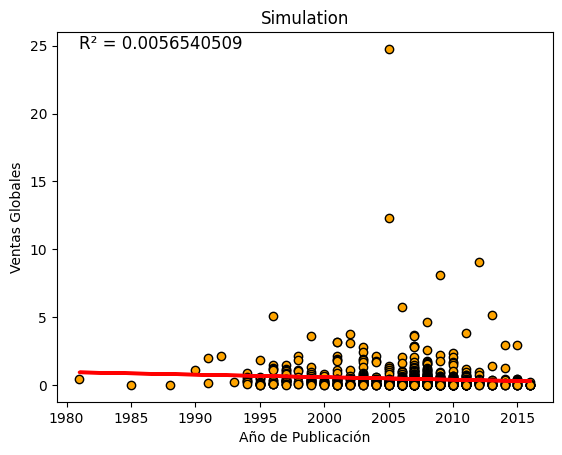

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 1.2021057212
10       24.272312
41       11.782312
73        8.733208
83        7.697110
153       5.251012
           ...    
16206    -0.346792
16236    -0.402890
16239    -0.421589
16295    -0.271994
16317    -0.421589
Name: Global_Sales, Length: 850, dtype: float64


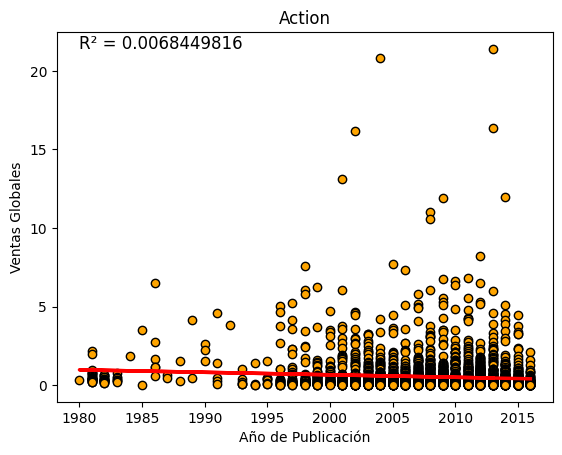

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 1.1609188083
16       20.951062
17       20.218186
23       15.931062
24       15.526436
38       12.460560
           ...    
16289    -0.534189
16292    -0.423063
16307    -0.629440
16308    -0.661190
16314    -0.391312
Name: Global_Sales, Length: 3252, dtype: float64


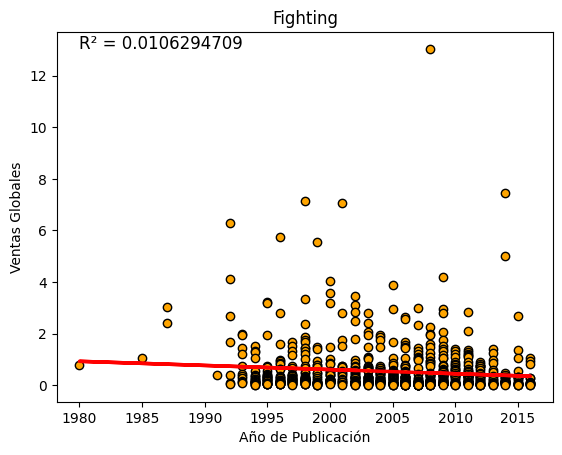

Media de Residuos: -0.0000000000
Desviación Estándar de Residuos: 0.9522405597
39       12.562878
97        7.069101
105       6.522508
107       6.480619
136       5.566286
           ...    
16208    -0.402973
16231    -0.611455
16266    -0.467122
16277    -0.483159
16288    -0.563344
Name: Global_Sales, Length: 836, dtype: float64


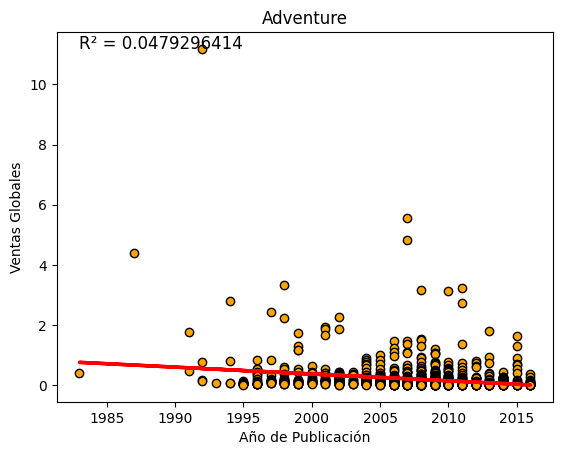

Media de Residuos: 0.0000000000
Desviación Estándar de Residuos: 0.4979419375
50       10.628851
158       5.340249
217       4.620249
250       3.715052
398       2.925410
           ...    
16297    -0.176991
16300    -0.176991
16305    -0.176991
16311    -0.154231
16316    -0.268031
Name: Global_Sales, Length: 1276, dtype: float64


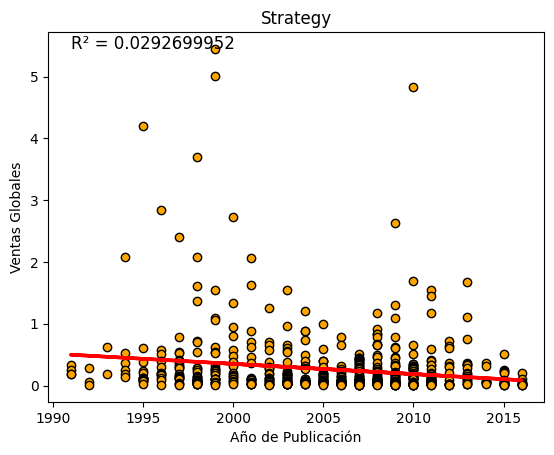

Media de Residuos: 0.0000000000
Desviación Estándar de Residuos: 0.5160834774
165      5.082721
203      4.642721
216      4.644102
266      3.776764
334      3.316232
           ...   
16235   -0.225365
16257   -0.159408
16264   -0.192387
16280   -0.076962
16291   -0.142919
Name: Global_Sales, Length: 671, dtype: float64


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear lista de generos unicos en tus datos 

generos_unicos = df['Genre'].unique()

for genero in generos_unicos:
    datos_genero = df[df['Genre']==genero]

    X= datos_genero['Year']
    y= datos_genero['Global_Sales']
    regresion_lineal = LinearRegression()
    regresion_lineal.fit(X.values.reshape(-1,1),y)
    m = regresion_lineal.coef_ 
    n = regresion_lineal.intercept_
    y_pred = regresion_lineal.predict(X.values.reshape(-1,1))
    r2 = r2_score(y, y_pred)
    plt.scatter(X, y, label=f'{genero} (R^2={r2:.2f})', edgecolors= "k",color = "orange")
    plt.plot(X, m*X+n, color="red",lw=2.5)
    titulo_genero = genero
    plt.title(f'{titulo_genero}')
    plt.xlabel('Año de Publicación')
    plt.ylabel('Ventas Globales')
    plt.text(X.min(), y.max(), f'R² = {r2:.10f}', fontsize=12)
    plt.show()
    residuos =  y-y_pred
    media_residuos = np.mean(residuos)
    desviacion_estandar_residuos = np.std(residuos)
    print(f'Media de Residuos: {media_residuos:.10f}')
    print(f'Desviación Estándar de Residuos: {desviacion_estandar_residuos:.10f}')
    print(residuos)


3.3 b) Notamos que la regresión lineal no es muy apropiada para el caso de ventas de videojuegos, ya que el crecimiento parece ser extremadamente no lineal. Esto lo podemos verificar con los valores de R, ya que son cercanos a 0. En conclusión, no es un modelo muy idóneo para representar esta muestra de datos.

3.3 c) El primer comportamiento que podemos notar es que los residuos tienen media 0. Este comportamiento se puede explicar de manera formal con un poco de análisis de regresión (vease https://stats.stackexchange.com/questions/189584/why-do-residuals-in-linear-regression-always-sum-to-zero-when-an-intercept-is-in), pero intuitivamente, al agregar el intercepto, lo que estamos haciendo es absorber por cada resta calculada, el error que hay, ya que como es la recta que mejor se aproxima, el error que se comete en las cantidades $y_i - y > 0$ se va a cancelar con el error $y_i - y < 0.$ Luego, como la suma de residuos es 0, claramente su media también sera 0. Por otra parte, mientras más outliers hay, o mientras los outliers son más exagerados, la desviación estándar tiene a crecer, puesto que tenemos una cantidad cuadrática a la que le sacamos la raíz. Al elevar al cuadrado, la dispersión aumenta.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=99ca8d8b-1c23-4ad2-91c3-f39788b7c788' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>